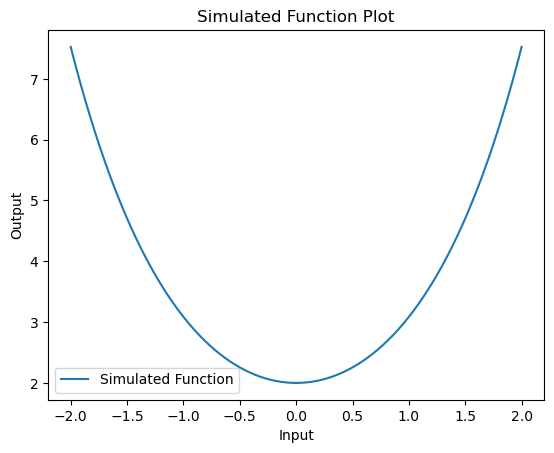

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

def simulate_function(x):
    return np.exp(x)+np.exp(-1*x) 

x_train = np.expand_dims(np.arange(-5, 5, 0.001),1)
y_train = simulate_function(x_train)

x_val = np.linspace(-2, 2, 2000)
y_val = simulate_function(x_val)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_val = torch.tensor(x_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

plt.plot(x_val, y_val, label='Simulated Function')
plt.title('Simulated Function Plot')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

In [34]:
class Model(nn.Module):
    def __init__(self,):
        super(Model, self).__init__()
    
        self.input_layer = nn.Linear(1, 12)
        
        self.hidden_layers = nn.ModuleList([
            nn.Linear(12, 10),
            nn.Linear(10, 18),
            nn.Linear(18, 8),
            nn.Linear(8, 6),
            nn.Linear(6, 5)
        ])
        
        
        self.output_layer = nn.Linear(5, 1)
        

    def forward(self, x):
        x = self.input_layer(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        
        for hidden_layer in self.hidden_layers:
            x = hidden_layer(x)
            x = F.leaky_relu(x, negative_slope=0.2)
        
        output = self.output_layer(x)
        return output

model = Model()

optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)
loss_function = torch.nn.MSELoss()
model_total_params = sum(p.numel() for p in model.parameters())
print(f'Number of Model Parameters: {model_total_params}')

Number of Model Parameters: 599


In [35]:
def train_model(model, optimizer, x_train, y_train):
    model.train()
    epochs = 15000
    tolerance = 1e-5
    losses = []
    grad_arr = []
    epoch_arr = []
    prev_loss = float('inf')

    for epoch in range(epochs):
        epoch_arr.append(epoch)
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = loss_function(outputs, y_train)
        loss.backward()
        optimizer.step()

        losses.append(loss.detach().numpy())
        
        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5
        
        grad_arr.append(grad_norm)

        if epoch % 150 == 0:
            print(f'Epoch: {epoch}, Loss = {loss.item():.4f}')

        if epoch > 0 and abs(prev_loss - loss.item()) < tolerance:
            print(f"Convergence reached at epoch {epoch} with Loss = {loss.item()}")
            break

        prev_loss = loss.item()

    return losses, grad_arr, epoch_arr

model_losses, model_grad_norms, model_epoch_arr = train_model(model, optimizer, x_train, y_train)

Epoch: 0, Loss = 2198.7993
Epoch: 150, Loss = 602.0233
Epoch: 300, Loss = 803.7288
Epoch: 450, Loss = 533.3306
Epoch: 600, Loss = 560.3052
Epoch: 750, Loss = 659.3469
Epoch: 900, Loss = 326.5536
Epoch: 1050, Loss = 277.4257
Epoch: 1200, Loss = 564.7454
Epoch: 1350, Loss = 310.5602
Epoch: 1500, Loss = 1179.4233
Epoch: 1650, Loss = 281.5714
Epoch: 1800, Loss = 1075.6884
Epoch: 1950, Loss = 391.4520
Epoch: 2100, Loss = 529.1510
Epoch: 2250, Loss = 223.4391
Epoch: 2400, Loss = 1085.1624
Epoch: 2550, Loss = 389.0490
Epoch: 2700, Loss = 1007.0576
Epoch: 2850, Loss = 128.7416
Epoch: 3000, Loss = 124.0383
Epoch: 3150, Loss = 61.2721
Epoch: 3300, Loss = 160.4456
Epoch: 3450, Loss = 322.2890
Epoch: 3600, Loss = 127.2452
Epoch: 3750, Loss = 263.8582
Epoch: 3900, Loss = 225.4834
Epoch: 4050, Loss = 1013.7489
Epoch: 4200, Loss = 257.4004
Epoch: 4350, Loss = 59.1555
Epoch: 4500, Loss = 98.3081
Epoch: 4650, Loss = 290.3068
Epoch: 4800, Loss = 32.2572
Epoch: 4950, Loss = 78.9403
Epoch: 5100, Loss = 13

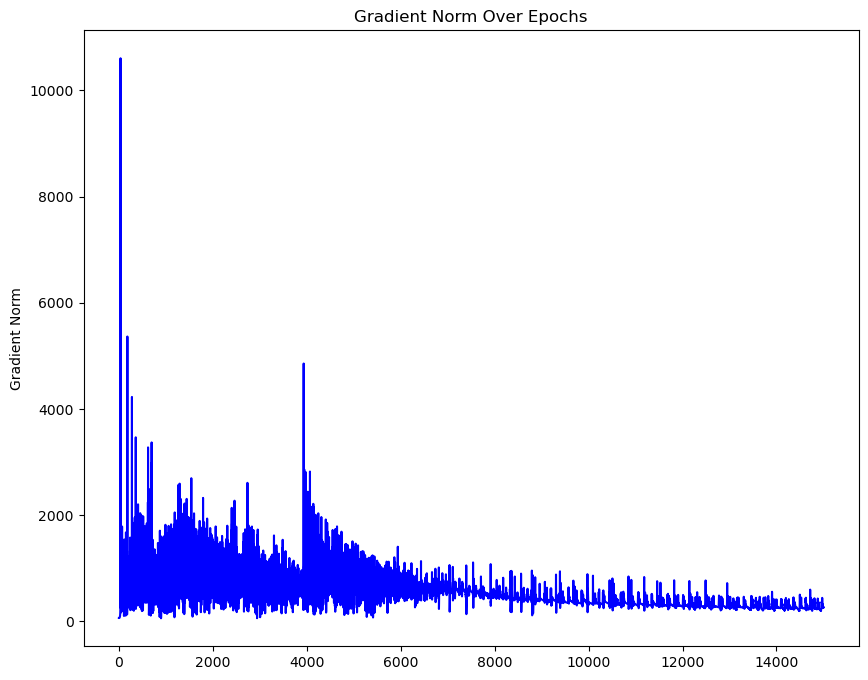

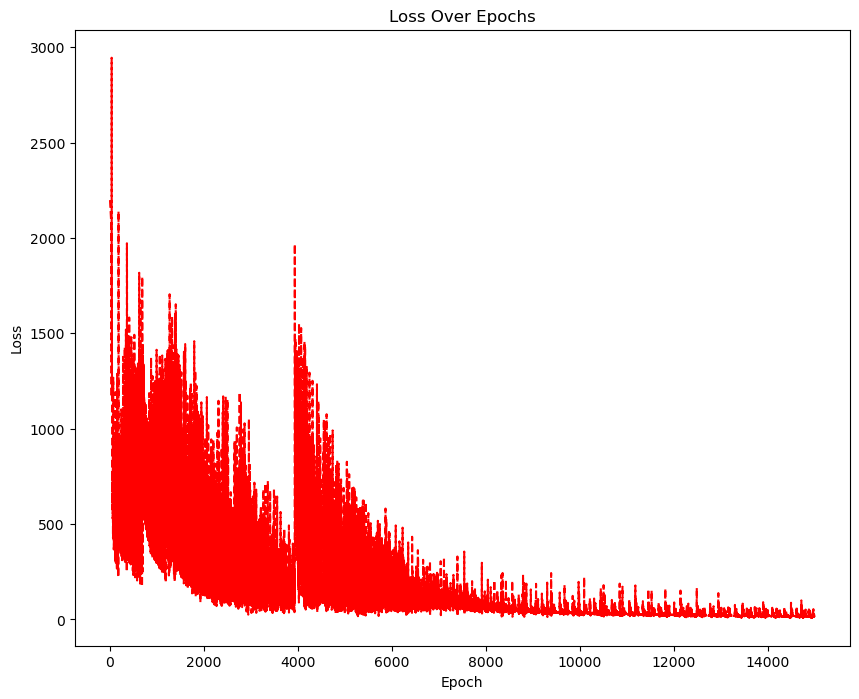

In [37]:

epochs = range(len(model_grad_norms))

# Gradient Norm Plot
plt.figure(figsize=(10, 8))
plt.plot(epochs, model_grad_norms, color='blue')
plt.title('Gradient Norm Over Epochs')
plt.ylabel('Gradient Norm')
plt.show()

# Loss Plot
plt.figure(figsize=(10, 8))
plt.plot(epochs, model_losses, color='red', linestyle='--')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
